# Submit titanic dataset using decision tree

In [67]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [68]:
# import dependencies
%matplotlib inline

# Data manipulattion
import numpy as np
import pandas as pd

# Data visualisaton?
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

# Preprocessing
from  sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from numpy import nan
from sklearn.impute import SimpleImputer

# Machine Learning
from sklearn.tree import DecisionTreeClassifier

import os


## Read data

In [2]:
train = pd.read_csv("Titanic_CSV/train.csv")
test = pd.read_csv("Titanic_CSV/test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
train["Ticket"].nunique()

681

# Missing values

Tip from Aussie Guy: missingno package is an easy way to visualise missing values.

In [8]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

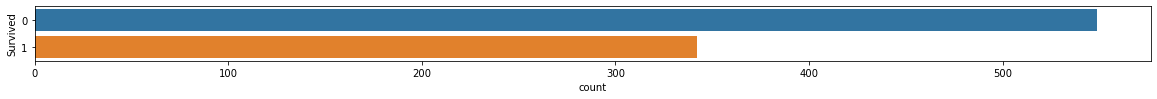

In [10]:
fig = plt.figure(figsize = (20, 1))
sns.countplot(y=train["Survived"])


# Start looking through all the columns sequentially

## Pclass column

### Think about seeing whether values are closely distributed, if there was a Pclass of 10, delete?

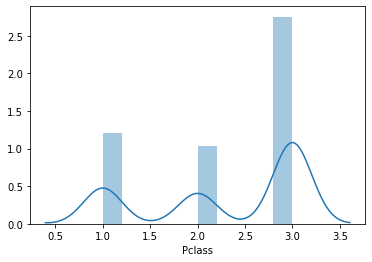

In [11]:
sns.distplot(train["Pclass"])

In [12]:
train["Pclass"].isna().sum()

0

## Name column

This is probably useless. Aussie guy says maybe you can slice out the Mr. Ms. Dr. and create another column? Unsure what that means

## Sex column

These values are strings, need to convert to binary

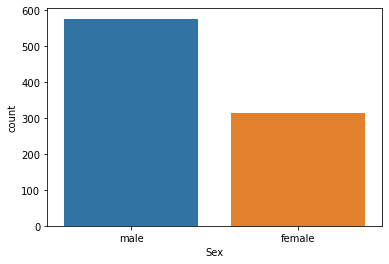

In [13]:
sns.countplot(train["Sex"])

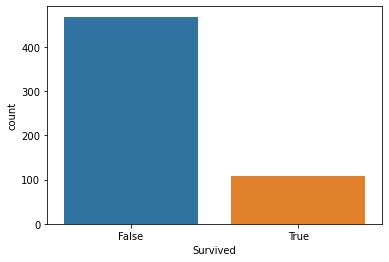

In [71]:
series_of_males = train["Sex"]=="male"
series_of_females = train["Sex"]=="female"
series_of_survivors = train["Survived"]==1


males_who_survived = series_of_survivors[series_of_males]
females_who_survived = series_of_survivors[series_of_females]
sns.countplot(x=males_who_survived)

# train[(train["Sex"]=="male") & (train["Survived"]==1)].count()

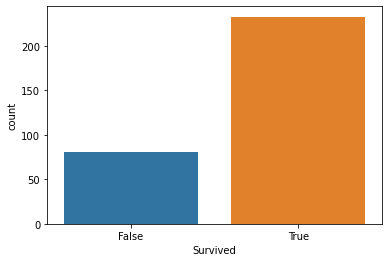

In [69]:
sns.countplot(x=females_who_survived)

**Above is just practice, please do it as seen below**

Sex,female,male
Survived,,
0,0.147541,0.852459
1,0.681287,0.318713


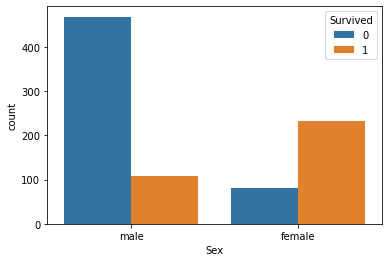

In [16]:
sns.countplot(x=train["Sex"], hue=train["Survived"], data=train)
pd.crosstab(train["Survived"], train["Sex"], normalize="index") # better research what this normalize argument does

In [17]:
train["Age"].isna().sum()

177

## Age

Has null values, let's fill them with average age. 
Alternative, fill them by average age per gender?

## Sibsp


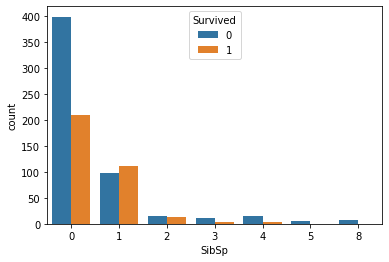

In [18]:
sns.countplot(train["SibSp"], hue=train["Survived"])

## Parch

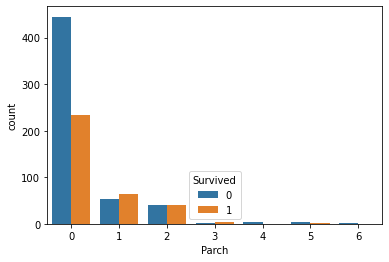

In [19]:
sns.countplot(train["Parch"], hue=train["Survived"])

## Ticket

In [20]:
# sns.countplot(train["Ticket"]) Too many values, high dimensionality

## Fare

Same issue with ticket, too many values
But this is a continuous value

## Cabin

This column should not be considered because there are simply too many na values

In [21]:
train["Cabin"].isna().sum()

687

## Embarked

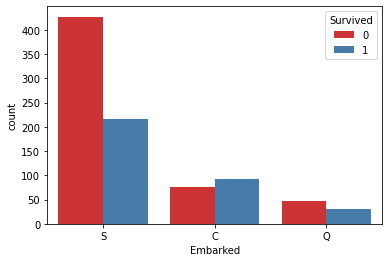

In [22]:
sns.countplot(train["Embarked"], hue=train["Survived"], palette = "Set1")

---
# Begin preprocessing

In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We want to use Survived, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked

Begin by dropping the unwanted

In [24]:
train.drop(["Name", "Ticket", "Cabin"], axis="columns", inplace=True)
test.drop(["Name", "Ticket", "Cabin"], axis="columns", inplace=True)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


## Fill in missing values

In [26]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [27]:
test.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [28]:
train["Age"].fillna(train["Age"].mean(), inplace=True)

train["Embarked"].isna()
train[train["Embarked"].isna()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,62,1,1,female,38.0,0,0,80.0,NaN
829,830,1,1,female,62.0,0,0,80.0,NaN


In [29]:
train["Embarked"].fillna("S", inplace=True)

In [30]:
test["Age"].fillna(train["Age"].mean(), inplace=True)
test["Fare"].fillna(train["Fare"].mean(), inplace=True)

In [31]:
test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [32]:
train.loc[(61, 829), :]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,62,1,1,female,38.0,0,0,80.0,S
829,830,1,1,female,62.0,0,0,80.0,S


In [33]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [34]:
X_train = train.drop("Survived", axis="columns")
y_train = train["Survived"]

In [35]:
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S


In [36]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Perform imputation

In [37]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [38]:
ohe = OneHotEncoder(handle_unknown="ignore", sparse=False) 
#handle-unknown false avoids errors when validation contains classes not in training
#sparse = False returns in numpy array rather than sparse matrix

OH_cols_train = ohe.fit_transform(X_train[["Sex", "Embarked"]])
OH_cols_test = ohe.transform(test[["Sex", "Embarked"]])




OH_column_names = ohe.get_feature_names(['Sex', 'Embarked'])
OH_cols_train_df= pd.DataFrame(OH_cols_train, columns = OH_column_names)
OH_cols_train_df.index=X_train.index # Not sure exactly what this does but it's important 
OH_cols_test_df = pd.DataFrame(OH_cols_test, columns = OH_column_names) 
OH_cols_test_df.index = test.index


In [39]:
OH_cols_test_df

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
413,0.0,1.0,0.0,0.0,1.0
414,1.0,0.0,1.0,0.0,0.0
415,0.0,1.0,0.0,0.0,1.0
416,0.0,1.0,0.0,0.0,1.0


In [40]:
# Drop Sex and embarked

X_train.drop(["Sex", "Embarked"], axis="columns", inplace=True)
test.drop(["Sex", "Embarked"], axis="columns", inplace=True)

In [41]:
X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [42]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875
3,895,3,27.0,0,0,8.6625
4,896,3,22.0,1,1,12.2875


In [43]:
X_train = pd.concat([X_train, OH_cols_train_df], axis=1)
test = pd.concat([test, OH_cols_test_df], axis=1)

In [44]:
X_train.head()


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,2,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,3,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,4,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,5,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0


In [45]:
test.sample(10)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
391,1283,1,51.000000,0,1,39.4000,1.0,0.0,0.0,0.0,1.0
404,1296,1,43.000000,1,0,27.7208,0.0,1.0,1.0,0.0,0.0
173,1065,3,29.699118,0,0,7.2292,0.0,1.0,1.0,0.0,0.0
372,1264,1,49.000000,0,0,0.0000,0.0,1.0,0.0,0.0,1.0
143,1035,2,28.000000,0,0,26.0000,0.0,1.0,0.0,0.0,1.0
121,1013,3,29.699118,1,0,7.7500,0.0,1.0,0.0,1.0,0.0
195,1087,3,33.000000,0,0,7.8542,0.0,1.0,0.0,0.0,1.0
49,941,3,36.000000,0,2,15.9000,1.0,0.0,0.0,0.0,1.0
68,960,1,31.000000,0,0,28.5375,0.0,1.0,1.0,0.0,0.0
227,1119,3,29.699118,0,0,7.7500,1.0,0.0,0.0,1.0,0.0


# Model

In [46]:
my_tree = DecisionTreeClassifier()
my_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [49]:
my_tree.predict(test)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [54]:
# Create a data frame with two columns: PassengerId & Survived for the final submission
submission_df = pd.DataFrame()
submission_df["PassengerId"]=test["PassengerId"]
submission_df["Survived"]=my_tree.predict(test)
submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [56]:
if len(submission_df)==len(test):
    print("Success")
else:
    print("Fail")

Success


In [62]:
os.getcwd()

'C:\\Users\\User\\Desktop\\PROJECT WORK\\Jupyter Repo'

In [65]:
submission_df.to_csv("../first.csv", index=False)

# Summary

## Score: 0.74162

Use missingno package
Pipeline for faster preprocessing? Do these steps per feature or all at once at the start?
Gender only score is *0.7677* apparently, try show how it can be derived from the data (heatmap?) Strong correlation?
What is column transformer??
Introduce cross-validation, for hyperparameter tuning only. Model selection can do some other time.
Use random forests for the next model
Correlation coefficient




Another beginner: https://www.kaggle.com/pallavisama/titanic-survival-analysis
